In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# For text processing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
texts = ['His smile was not perfect smile smile sang sang smile smile ', 
         'His smile was not not not not perfect sang sang smile smile smile smile ', 
         'she she she she not sang sang sang sang '
        ]

In [18]:
# default 
# - n-grams = 1
# - stopwords filterations : false
# - lowercase : yes

# instantiate the vectorizer
vect_tfidf = TfidfVectorizer(analyzer='word')

In [19]:
# train (Bow) 
vect_tfidf.fit(texts)

TfidfVectorizer()

In [20]:
# get all the feature/token names
print("Vocabulary size: {}".format(len(vect_tfidf.vocabulary_)))

feature_names = vect_tfidf.get_feature_names()
print(feature_names)

print("Vocabulary content:\n {}".format(vect_tfidf.vocabulary_))

Vocabulary size: 7
['his', 'not', 'perfect', 'sang', 'she', 'smile', 'was']
Vocabulary content:
 {'his': 0, 'smile': 5, 'was': 6, 'not': 1, 'perfect': 2, 'sang': 3, 'she': 4}


In [21]:
# prepare dtm
X_train_tfidf_dtm = vect_tfidf.transform(texts)

In [22]:
print(type(X_train_tfidf_dtm))
print(X_train_tfidf_dtm.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
[[0.17956055 0.13944479 0.17956055 0.27888957 0.         0.89780275
  0.17956055]
 [0.15799185 0.49077906 0.15799185 0.24538953 0.         0.78995925
  0.15799185]
 [0.         0.1261204  0.         0.50448158 0.85416157 0.
  0.        ]]


In [23]:
# create a dataframe
pd.DataFrame(X_train_tfidf_dtm.toarray(), columns=feature_names)

,his,not,perfect,sang,she,smile,was
0,0.179561,0.139445,0.179561,0.278890,0.000000,0.897803,0.179561
1,0.157992,0.490779,0.157992,0.245390,0.000000,0.789959,0.157992
2,0.000000,0.126120,0.000000,0.504482,0.854162,0.000000,0.000000


In [24]:
# IDF: The inverse document frequency

In [25]:
idf = vect_tfidf.idf_

In [26]:
idf

array([1.28768207, 1.        , 1.28768207, 1.        , 1.69314718,
       1.28768207, 1.28768207])

In [27]:
X_train_with_idf = dict(zip(vect_tfidf.get_feature_names(), idf))

In [28]:
X_train_with_idf

{'his': 1.2876820724517808,
 'not': 1.0,
 'perfect': 1.2876820724517808,
 'sang': 1.0,
 'she': 1.6931471805599454,
 'smile': 1.2876820724517808,
 'was': 1.2876820724517808}

In [29]:
# sorted(X_train_with_idf.values())

In [30]:
# We see that the tokens 'sang','she' have the most idf weight because they are the only 
# tokens that appear in one document only.

# The token 'not' appears 6 times but it is also in all documents, so its idf is the lowest

In [31]:
X_train_with_idf

{'his': 1.2876820724517808,
 'not': 1.0,
 'perfect': 1.2876820724517808,
 'sang': 1.0,
 'she': 1.6931471805599454,
 'smile': 1.2876820724517808,
 'was': 1.2876820724517808}

In [32]:
X_train_with_idf.items()

dict_items([('his', 1.2876820724517808), ('not', 1.0), ('perfect', 1.2876820724517808), ('sang', 1.0), ('she', 1.6931471805599454), ('smile', 1.2876820724517808), ('was', 1.2876820724517808)])

In [33]:
sorted(X_train_with_idf.items(), key = lambda x : x[1])

[('not', 1.0),
 ('sang', 1.0),
 ('his', 1.2876820724517808),
 ('perfect', 1.2876820724517808),
 ('smile', 1.2876820724517808),
 ('was', 1.2876820724517808),
 ('she', 1.6931471805599454)]

In [34]:
# Graphing inverse document frequency

df_X_idf = pd.DataFrame.from_dict(X_train_with_idf, orient='index').reset_index()
df_X_idf.columns=('token','weight')

df_X_idf = df_X_idf.sort_values(by='weight', ascending=False)
df_X_idf 

,token,weight
4,she,1.693147
0,his,1.287682
2,perfect,1.287682
5,smile,1.287682
6,was,1.287682
1,not,1.000000
3,sang,1.000000


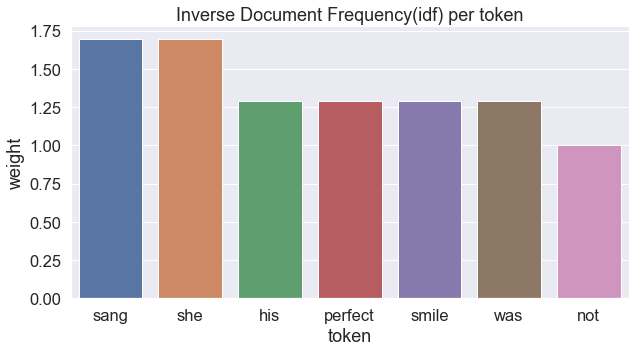

In [32]:
sns.barplot(x='token', y='weight', data=df_X_idf)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)

- Summary: the more times a token appears in a document, the more weight it will have. However, the more documents the token appears in, it is 'penalized' and the weight is diminished. 

- For example, the weight for token 'not' is 4, but if it did not appear in all documents (that is, only in one document) its weight 
would have been 8.3